<a href="https://colab.research.google.com/github/jmandrake/colab_eda_test/blob/main/colab_explore_data_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial: How to Do Data Exploration (step-by-step tutorial on real-life dataset)
https://www.youtube.com/watch?v=OY4eQrekQvs

# 1) Ingest Data
Download dataset and clean files


In [ ]:
# clean up and download datasets
!rm *.zip
!rm *.csv
!wget https://raw.githubusercontent.com/jmandrake/colab_eda_test/main/trees_partial_data.zip

In [2]:
!unzip "trees_partial_data.zip"

Archive:  trees_partial_data.zip
  inflating: trees_partial_data.csv  


In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('trees_partial_data.csv', encoding='utf-8')
df.head()
# df.shape
# df.columns

In [8]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [12]:
df_sub = df[['tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_common', 'steward',
       'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]

df_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,red maple,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,pin oak,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,honeylocust,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,American linden,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,455928,10,0,OnCurb,Alive,Good,pin oak,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
249996,456051,15,0,OnCurb,Alive,Good,pin oak,None,NoDamage,None,No,No,No,No,No,No,No,No,No
249997,461876,19,0,OnCurb,Alive,Fair,pin oak,None,Damage,"Stones,BranchOther",Yes,No,No,No,No,No,No,No,Yes
249998,411229,24,0,OffsetFromCurb,Alive,Good,pin oak,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No


In [11]:
# show total null values in each column
df_sub.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        12453
spc_common    12452
steward       12452
sidewalk      12452
problems      12466
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

In [13]:
df_sub[df_sub['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249790,440536,0,18,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
249792,443076,0,9,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
249801,465085,5,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
249805,484304,0,35,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [15]:
df_sub.describe()

,tree_id,tree_dbh,stump_diam
count,250000.000000,250000.000000,250000.000000
mean,311838.619720,11.072548,0.452108
std,81766.204368,8.710912,3.355798
min,7.000000,0.000000,0.000000
25%,246595.750000,4.000000,0.000000
50%,313206.500000,9.000000,0.000000
75%,379265.250000,16.000000,0.000000
max,520470.000000,450.000000,140.000000


In [16]:
df_sub.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_common    object
steward       object
sidewalk      object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
dtype: object

# 2) EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f300d338760>,
      dtype=object)

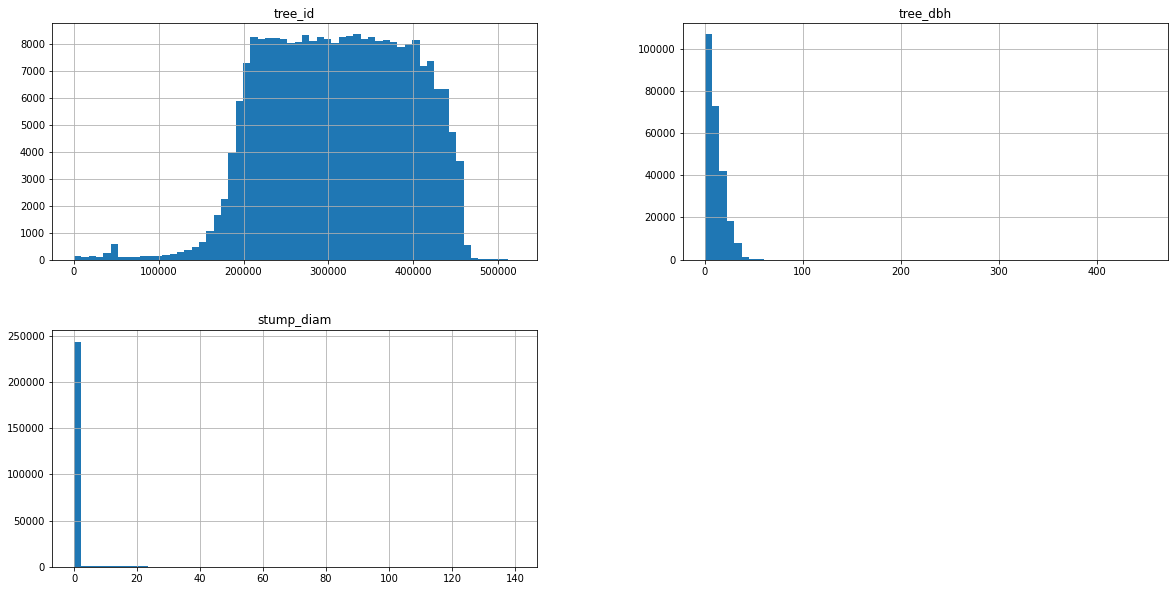

In [19]:
# check the data visually to look for outliers
df_sub.hist(bins=60, figsize=(20,10))

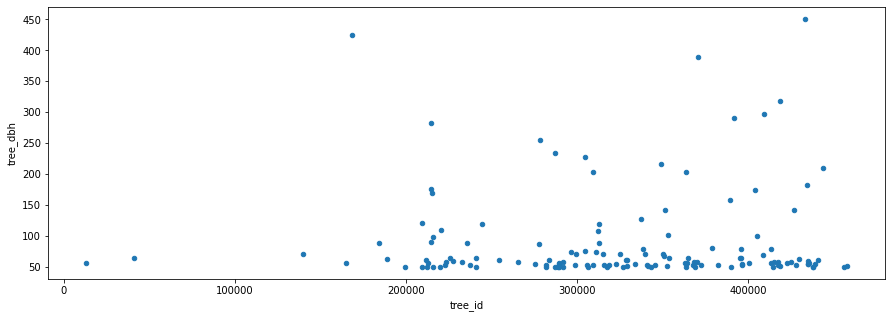

In [37]:
# look at distribution of possible outliers for tree diameters
big_trees = df_sub[df_sub['tree_dbh']>50]
big_trees[['tree_id', 'tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh', figsize=(15,5))

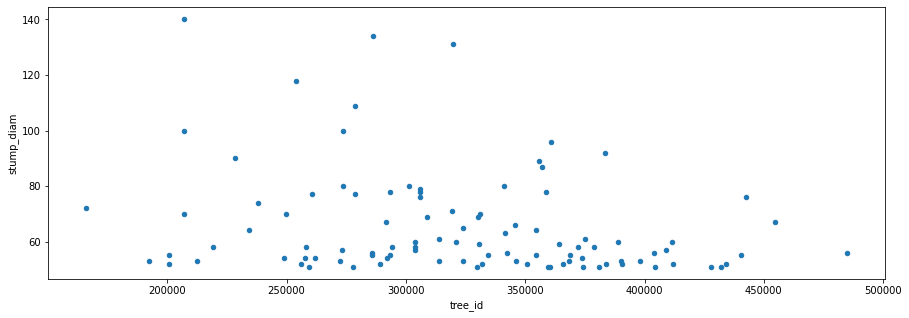

In [38]:
# look at distribution of possible outliers for stump diameters
big_stumps = df_sub[df_sub['stump_diam']>50]
big_stumps[['tree_id', 'stump_diam']].plot(kind='scatter', x='tree_id', y='stump_diam', figsize=(15,5))

In [39]:
# count per tree species
pd.DataFrame(df_sub['spc_common'].value_counts())

,spc_common
London planetree,31204
honeylocust,22976
Callery pear,22803
pin oak,17788
Norway maple,13362
...,...
Atlas cedar,14
smoketree,12
Osage-orange,11
Virginia pine,7


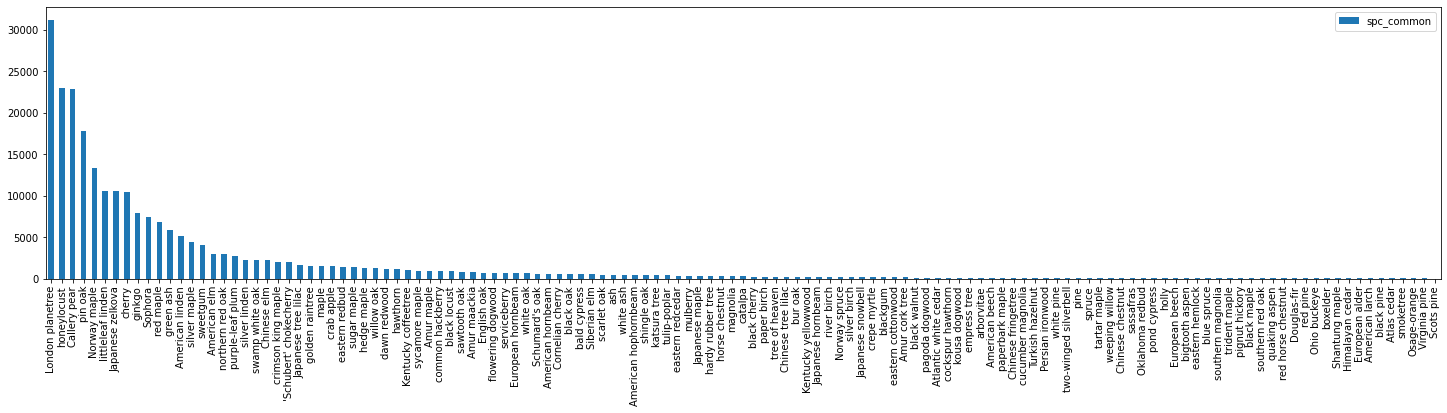

In [41]:
# plot count per tree species
pd.DataFrame(df_sub['spc_common'].value_counts()).plot(kind='bar', figsize=(25,5))

In [ ]:
# columns with null values:
# health        12453
# spc_common    12452
# steward       12452
# sidewalk      12452
# problems      12466

In [42]:
# what are the distinct values for steward? How clean is the data?
df_sub['steward'].value_counts()

None       172285
1or2        56173
3or4         8342
4orMore       748
Name: steward, dtype: int64

In [43]:
# what are distinct values for sidewalk
df_sub['sidewalk'].value_counts()

NoDamage    169434
Damage       68114
Name: sidewalk, dtype: int64

In [59]:
# what are distinct values for problems
df_sub['problems'].value_counts()

Stones                                                               5213
BranchLights                                                         3133
BranchOther                                                          1551
TrunkOther                                                           1520
RootOther                                                            1297
                                                                     ... 
RootOther,WiresRope,BranchLights,BranchOther                            1
WiresRope,Sneakers                                                      1
TrunkLights,Sneakers                                                    1
MetalGrates,WiresRope,BranchLights                                      1
Stones,MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther       1
Name: problems, Length: 144, dtype: int64

In [64]:
#df_sub['problems'].dropna()
#df_sub = df_sub[df_sub['problems'] != "None"]
df_sub['problems'].value_counts()


Stones                                                               5213
BranchLights                                                         3133
BranchOther                                                          1551
TrunkOther                                                           1520
RootOther                                                            1297
                                                                     ... 
RootOther,WiresRope,BranchLights,BranchOther                            1
WiresRope,Sneakers                                                      1
TrunkLights,Sneakers                                                    1
MetalGrates,WiresRope,BranchLights                                      1
Stones,MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther       1
Name: problems, Length: 144, dtype: int64

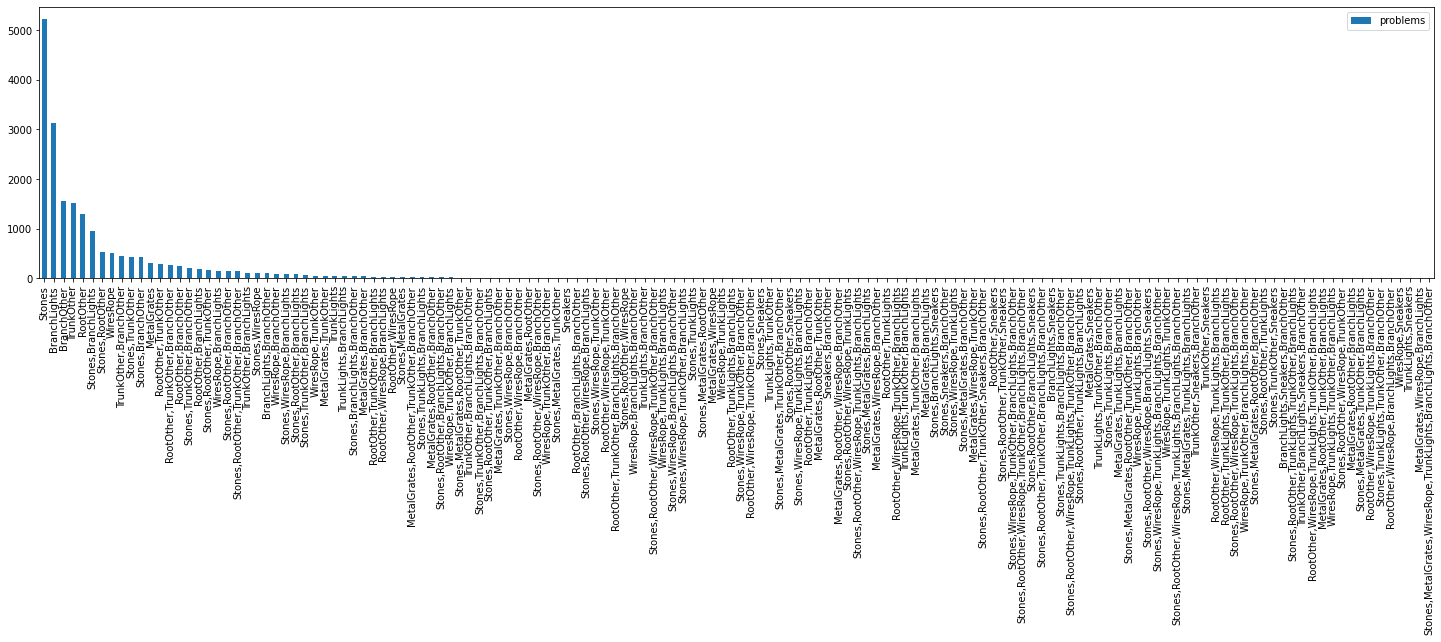

In [65]:
pd.DataFrame(df_sub['problems'].value_counts()).plot(kind='bar', figsize=(25,5))

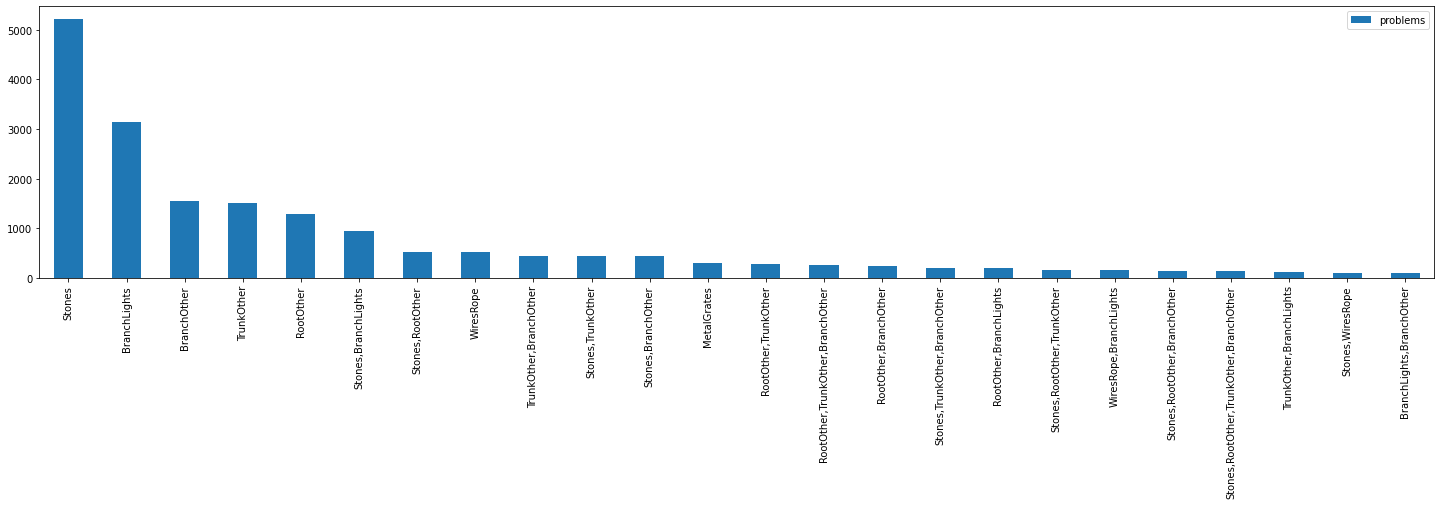

In [70]:
import matplotlib.pyplot as plt

# Create a new DataFrame with only the 'problems' column
df_problems = pd.DataFrame(df_sub['problems'].value_counts())

# Select rows where the value in the 'problems' column is greater than x
df_problems = df_problems[df_problems['problems'] > 100]

# Plot the 'problems' column as a bar chart
df_problems.plot(kind='bar', figsize=(25,5))

# Show the plot
plt.show()
